Logisitc Regression
--------------------------

Logistic Regression (also called Logit Regression) is commonly
 used to estimate the probability that an instance belongs to a particular class (e.g.,
 what is the probability that this email is spam?). If the estimated probability is greater
 than 50%, then the model predicts that the instance belongs to that class (called the
 positive class, labeled “1”), and otherwise it predicts that it does not (i.e., it belongs to
 the negative class, labeled “0”). This makes it a binary classifier.

#### Estimating Probabilities

Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term),
but instead of outputting the result directly it outputs the logistic of this result.... you should check the main book for the equations and the Training and cost functions

### Decision Boundaries

Let’s use the iris dataset to illustrate Logistic Regression. This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris setosa, Iris versicolor, and Iris virginica

Lets try and build a classifier to detect the Iris virginica type based only on the petal width feature.

In [136]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.linear_model import LogisticRegression

In [137]:
# loading data

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [138]:
X =  iris["data"][:, 3:] # width of petal
y = (iris["target"] == 2).astype(np.int_) # 1 if Iris virginica, else 0
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [139]:
# Train a model

log_reg = LogisticRegression()
log_reg.fit(X=X, y=y)


LogisticRegression()

[[9.99249051e-01 7.50949397e-04]
 [9.99239224e-01 7.60776030e-04]
 [9.99229269e-01 7.70731151e-04]
 ...
 [3.08499021e-03 9.96915010e-01]
 [3.04523414e-03 9.96954766e-01]
 [3.00598887e-03 9.96994011e-01]]


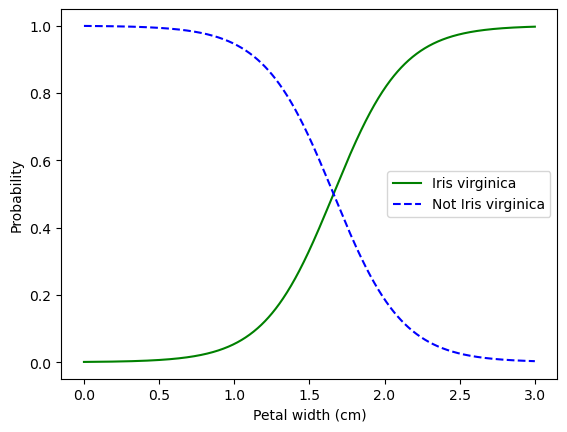

In [140]:
# checking the predictions of the model, thus its estimated probalities with the petal widths varying from 0 cm to 3 cm


X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

print(y_proba)
plt.plot(X_new, y_proba[:, 1], "g-")
plt.plot(X_new, y_proba[:, 0], "b--")
plt.plot()
plt.legend(['Iris virginica', 'Not Iris virginica'])
plt.ylabel('Probability')
plt.xlabel('Petal width (cm)')
plt.show()

# The petal width of Iris virginica flowers (represented by triangles) ranges from 1.4 cm
#  to 2.5 cm, while the other iris flowers (represented by squares) generally have a
#  smaller petal width, ranging from 0.1 cm to 1.8 cm. Notice that there is a bit of over
# lap. Above about 2 cm the classifier is highly confident that the flower is an Iris virgin
# ica (it outputs a high probability for that class), while below 1 cm it is highly
#  confident that it is not an Iris virginica (high probability for the “Not Iris virginica"
# class). In between these extremes, the classifier is unsure

In [141]:
log_reg.predict([[1.7], [1.5]])

# Therefore, there is a decision
#  boundary at around 1.6 cm where both probabilities are equal to 50%: if the petal
#  width is higher than 1.6 cm, the classifier will predict that the flower is an Iris virginica, 
# and otherwise it will predict that it is not (even if it is not very confident)

array([1, 0])

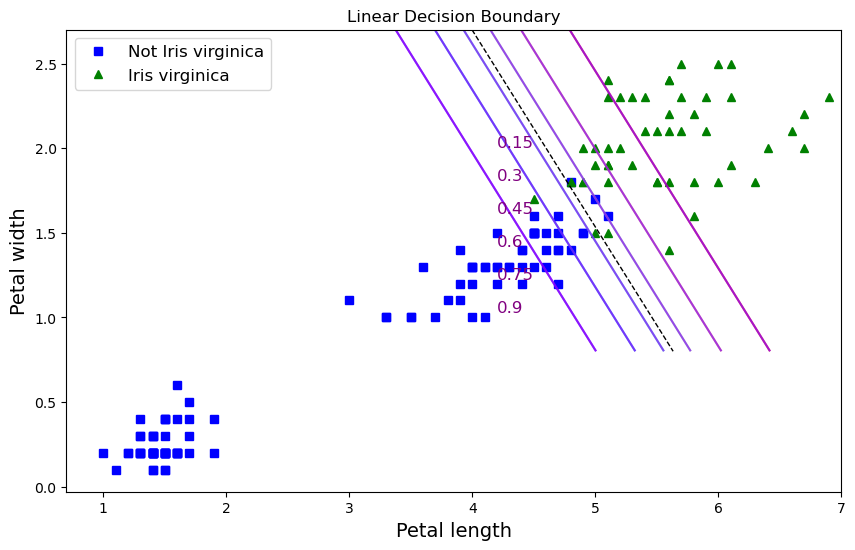

In [142]:
X = iris["data"][:, (2, 3)]  # length of petal
y = (iris["target"] == 2).astype(int)  

log_reg.fit(X, y)

x0, x1 = np.meshgrid(
    np.linspace(2.9, 7, 500).reshape(-1, 1),
    np.linspace(0.8, 2.7, 200).reshape(-1, 1),
)


X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)[:, 1].reshape(x0.shape)

plt.figure(figsize=(10, 6))
plt.plot(X[y == 0][:, 0], X[y == 0][:, 1], "bs", label="Not Iris virginica")
plt.plot(X[y == 1][:, 0], X[y == 1][:, 1], "g^", label="Iris virginica")

decision_boundary = (y_proba >= 0.5)
plt.contour(x0, x1, decision_boundary, colors="k", linewidths=1, linestyles="--")

contour_levels = [0.15, 0.3, 0.45, 0.6, 0.75, 0.9]
plt.contour(x0, x1, y_proba, levels=contour_levels, cmap="rainbow", alpha=0.7)

for level in contour_levels:
    plt.contour(x0, x1, y_proba, levels=[level], cmap="rainbow", alpha=0.7)
    plt.annotate(f"{level}", xy=(4.2, 2.2 - level * 1.3), color="purple", fontsize=12)

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.title("Linear Decision Boundary")
plt.show()

#  This shows the same dataset, but this time displaying two features: petal width
#  and length. Once trained, the Logistic Regression classifier can, based on these two
#  features, estimate the probability that a new flower is an Iris virginica. The dashed line
#  represents the points where the model estimates a 50% probability: this is the model’s
#  decision boundary. Note that it is a linear boundary.16 Each parallel line represents the
#  points where the model outputs a specific probability, from 15% (bottom left) to 90%
#  (top right). All the flowers beyond the top-right line have an over 90% chance of
#  being Iris virginica, according to the model.

Just like the other linear models, Logistic Regression models can be regularized using ℓ1 or ℓ2 penalties. Scikit-Learn actually adds an ℓ2 penalty by default.

The hyperparameter controlling the regularization strength of a Scikit-Learn LogisticRegression model is not alpha (as in other linear models), but its inverse: C. The higher the value of C, the less the model is regularized.

### Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers. This is called Softmax Regression, or Multinomial Logistic Regression...... Read this section in the book

Scikit Learn’s LogisticRegression uses one-versus-the-rest by default when you train it on more than two classes, but you can set the multi_class hyperparameter to "multinomial" to switch it to Softmax Regression.

In [143]:
softmax_reg = LogisticRegression(
    multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [144]:
softmax_reg.predict([[5, 2]])

array([1])

In [145]:
softmax_reg.predict_proba([[5, 2]])

array([[0.04687836, 0.95312164]])